In [0]:
## importando as bibliotecas necessarias

## split de dataset
from sklearn.model_selection import train_test_split

## utilidades
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#sns.set_style('darkgrid')

In [0]:
# i = []
# while(True):
#     i.append('a'*1000000000000)

## Conceitos iniciais - treino e teste

In [0]:
## lendo o dataset
df = pd.read_csv('/content/regression_dataset01_melbourne.csv',sep=';')
df.head()

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,Price
0,2,2.5,1.0,0.0,156.0,79.0,1035000.0
1,3,2.5,2.0,0.0,134.0,150.0,1465000.0
2,4,2.5,1.0,2.0,120.0,142.0,1600000.0
3,3,2.5,2.0,0.0,245.0,210.0,1876000.0
4,2,2.5,1.0,2.0,256.0,107.0,1636000.0


In [0]:
## verificando o tamanho
print(df.shape)

(9244, 7)


In [0]:
## verificando o tamanho de 4 partes iguais
9244 / 4

2311.0

In [0]:
## definindo X e y
X = df.drop('Price',axis=1)
y = df.Price

## splitando o dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [0]:
X_train

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea
7068,3,14.2,2.0,1.0,470.0,118.00
4982,1,5.4,1.0,1.0,0.0,62.00
665,5,10.7,3.0,2.0,915.0,233.00
5505,3,18.4,1.0,1.0,663.0,142.00
6277,3,17.2,1.0,1.0,653.0,119.00
...,...,...,...,...,...,...
5734,2,1.8,2.0,1.0,0.0,95.00
5191,4,17.2,1.0,1.0,842.0,160.00
5390,2,7.9,2.0,1.0,0.0,101.76
860,4,11.7,2.0,2.0,438.0,210.00


In [0]:
y_train

7068    1028800.0
4982     515000.0
665     2550000.0
5505     505000.0
6277     988000.0
          ...    
5734     785000.0
5191    1302000.0
5390     830000.0
860     1255000.0
7270    1175000.0
Name: Price, Length: 6933, dtype: float64

In [0]:
## verificando o shape dos datasets de treino e teste
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(6933, 6) (6933,)
(2311, 6) (2311,)


## Regressão Linear Simples

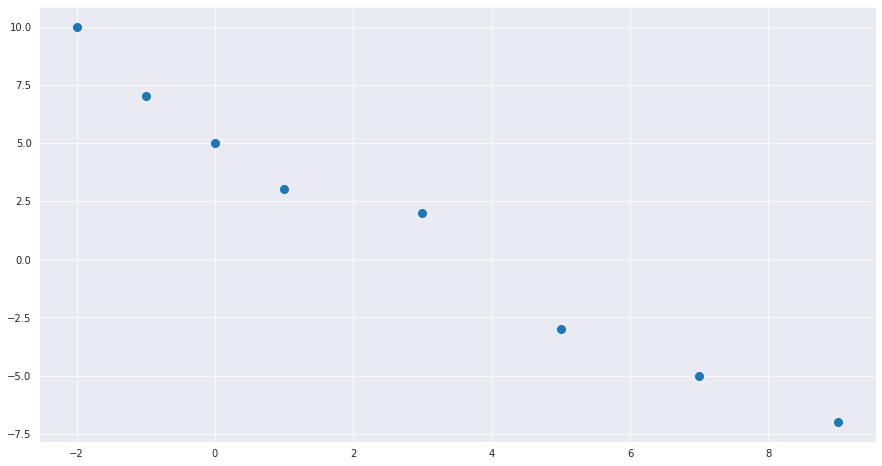

In [0]:
## verificando os dados para regressão linear simples

x = [-2,-1,0,1,3,5,7,9]
y = [10,7,5,3,2,-3,-5,-7]

plt.figure(figsize=(15,8))
sns.scatterplot(x=x,y=y,s=100)
plt.show()

In [0]:
## verificando a correlação

np.corrcoef(x,y)

array([[ 1.        , -0.98727131],
       [-0.98727131,  1.        ]])

In [0]:
## conferindo o resultado do google sheets

from sklearn.linear_model import LinearRegression

x = np.array([-2,-1,0,1,3,5,7,9]).reshape(-1,1)
y = [10,7,5,3,2,-3,-5,-7]

lr = LinearRegression()
lr.fit(x,y)
lr.coef_, lr.intercept_

(array([-1.49771689]), 5.6187214611872145)

In [0]:
## utilizando o predict

lr.predict([[1]])

array([4.12100457])

In [0]:
## gerando várias predições

for i in range(10):
  print(f'Predizendo para x={i} -- Resultado {lr.predict([[i]])}')

Predizendo para x=0 -- Resultado [5.61872146]
Predizendo para x=1 -- Resultado [4.12100457]
Predizendo para x=2 -- Resultado [2.62328767]
Predizendo para x=3 -- Resultado [1.12557078]
Predizendo para x=4 -- Resultado [-0.37214612]
Predizendo para x=5 -- Resultado [-1.86986301]
Predizendo para x=6 -- Resultado [-3.36757991]
Predizendo para x=7 -- Resultado [-4.8652968]
Predizendo para x=8 -- Resultado [-6.3630137]
Predizendo para x=9 -- Resultado [-7.86073059]


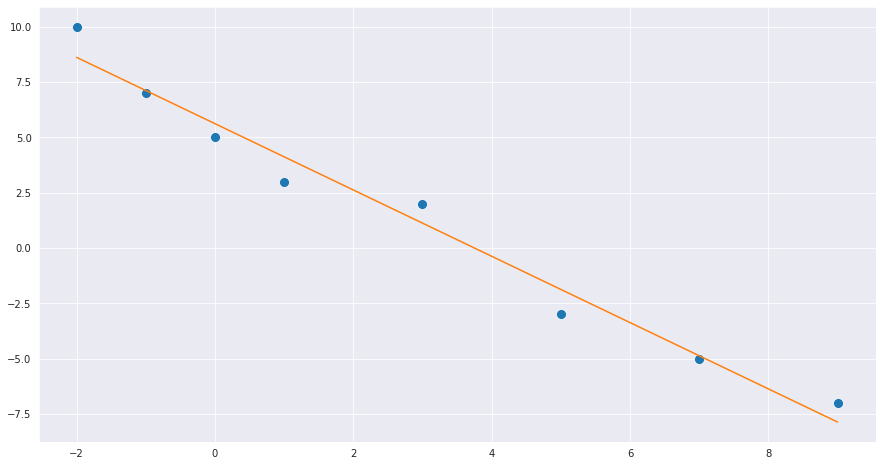

In [0]:
## verificando o modelo montado

x = [-2,-1,0,1,3,5,7,9]
y = [10,7,5,3,2,-3,-5,-7]

y_pred = [lr.predict([[x]])[0] for x in x]

plt.figure(figsize=(15,8))
sns.scatterplot(x=x,y=y,s=100)
sns.lineplot(x=x,y=y_pred,color='tab:orange')
plt.show()

Vamos dividir o dataset em treino e teste na mão! E treina-lo somente com TREINO.

In [0]:
## separando em treino e teste (0.25)

x_test = np.array([0,1]).reshape(-1,1)
y_test = [5,3]

x_treino = np.array([-2,-1,3,5,7,9]).reshape(-1,1)
y_treino = [10,7,2,-3,-5,-7]

lr2 = LinearRegression()
lr2.fit(x_treino,y_treino)
lr2.coef_, lr.intercept_

(array([-1.54973822]), 5.6187214611872145)

In [0]:
## utilizando predict

print(y_test)
lr2.predict(x_test)

[5, 3]


array([6.09075044, 4.54101222])

In [0]:
## definido nosso_mean_squared_error

def nosso_mean_squared_error(y_real,y_pred): 
  return ((y_real - y_pred)**2).mean()

In [0]:
## calculando nosso_mean_squared_error

valores_reais_de_y = np.array([5,3])
valores_preditos_de_y = np.array([6.09075044, 4.54101222])

nosso_mean_squared_error(valores_reais_de_y,valores_preditos_de_y)

1.7822275922747606

In [0]:
## usando a API do sklearn

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,lr2.predict(x_test))

1.782227582699063

In [0]:
## definido nosso_ROOT_mean_squared_error

def nosso_ROOT_mean_squared_error(y_real,y_pred): 
  return np.sqrt(((y_real - y_pred)**2).mean())

In [0]:
## calculando nosso_ROOT_mean_squared_error
## não tem no sklearn

nosso_ROOT_mean_squared_error(valores_reais_de_y,valores_preditos_de_y)

1.3350009708890704

In [0]:
## vamos tentar calcular o erro de treino

print(nosso_mean_squared_error(y_treino,lr2.predict(x_treino)))
print(nosso_ROOT_mean_squared_error(y_treino,lr2.predict(x_treino)))

0.662012798138453
0.8136416890366748


## Regressão Linear Múltipla (Melbourne)

In [0]:
## lendo o dataset
df = pd.read_csv('/content/regression_dataset01_melbourne.csv',sep=';')
df.head()

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,Price
0,2,2.5,1.0,0.0,156.0,79.0,1035000.0
1,3,2.5,2.0,0.0,134.0,150.0,1465000.0
2,4,2.5,1.0,2.0,120.0,142.0,1600000.0
3,3,2.5,2.0,0.0,245.0,210.0,1876000.0
4,2,2.5,1.0,2.0,256.0,107.0,1636000.0


In [0]:
## descrevendo o dataset

df.describe()

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,Price
count,9244.000000,9244.000000,9244.000000,9244.000000,9244.000000,9244.000000,9.244000e+03
mean,3.098118,11.241151,1.652423,1.695370,528.833838,156.994628,1.092329e+06
std,0.964029,6.882570,0.724991,0.975529,1212.965090,480.976260,6.796212e+05
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.310000e+05
25%,2.000000,6.400000,1.000000,1.000000,210.000000,100.000000,6.410000e+05
50%,3.000000,10.300000,2.000000,2.000000,474.000000,132.000000,9.000000e+05
75%,4.000000,13.900000,2.000000,2.000000,651.000000,181.000000,1.341250e+06
max,12.000000,48.100000,9.000000,10.000000,44500.000000,44515.000000,9.000000e+06


In [0]:
## range de Price

df.Price.max() - df.Price.min()

8869000.0

In [0]:
## verificando valores nulos
df.isna().sum()

Rooms           0
Distance        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
Price           0
dtype: int64

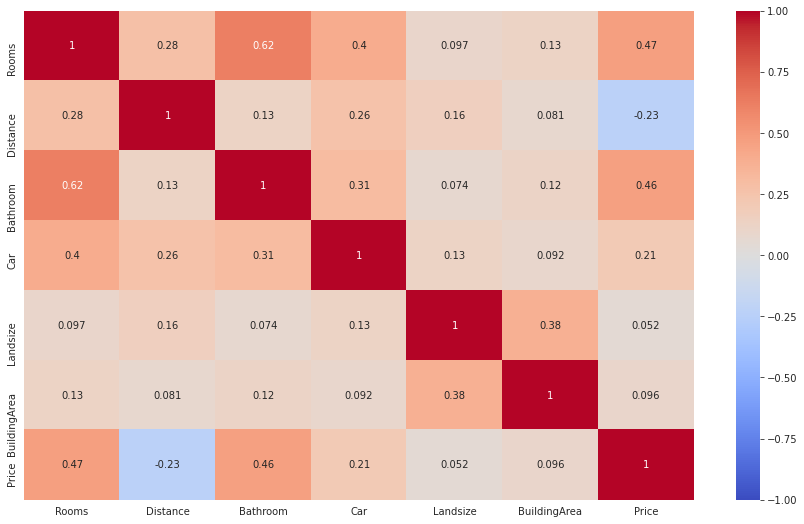

In [0]:
## verificando as correlações
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')
plt.show()

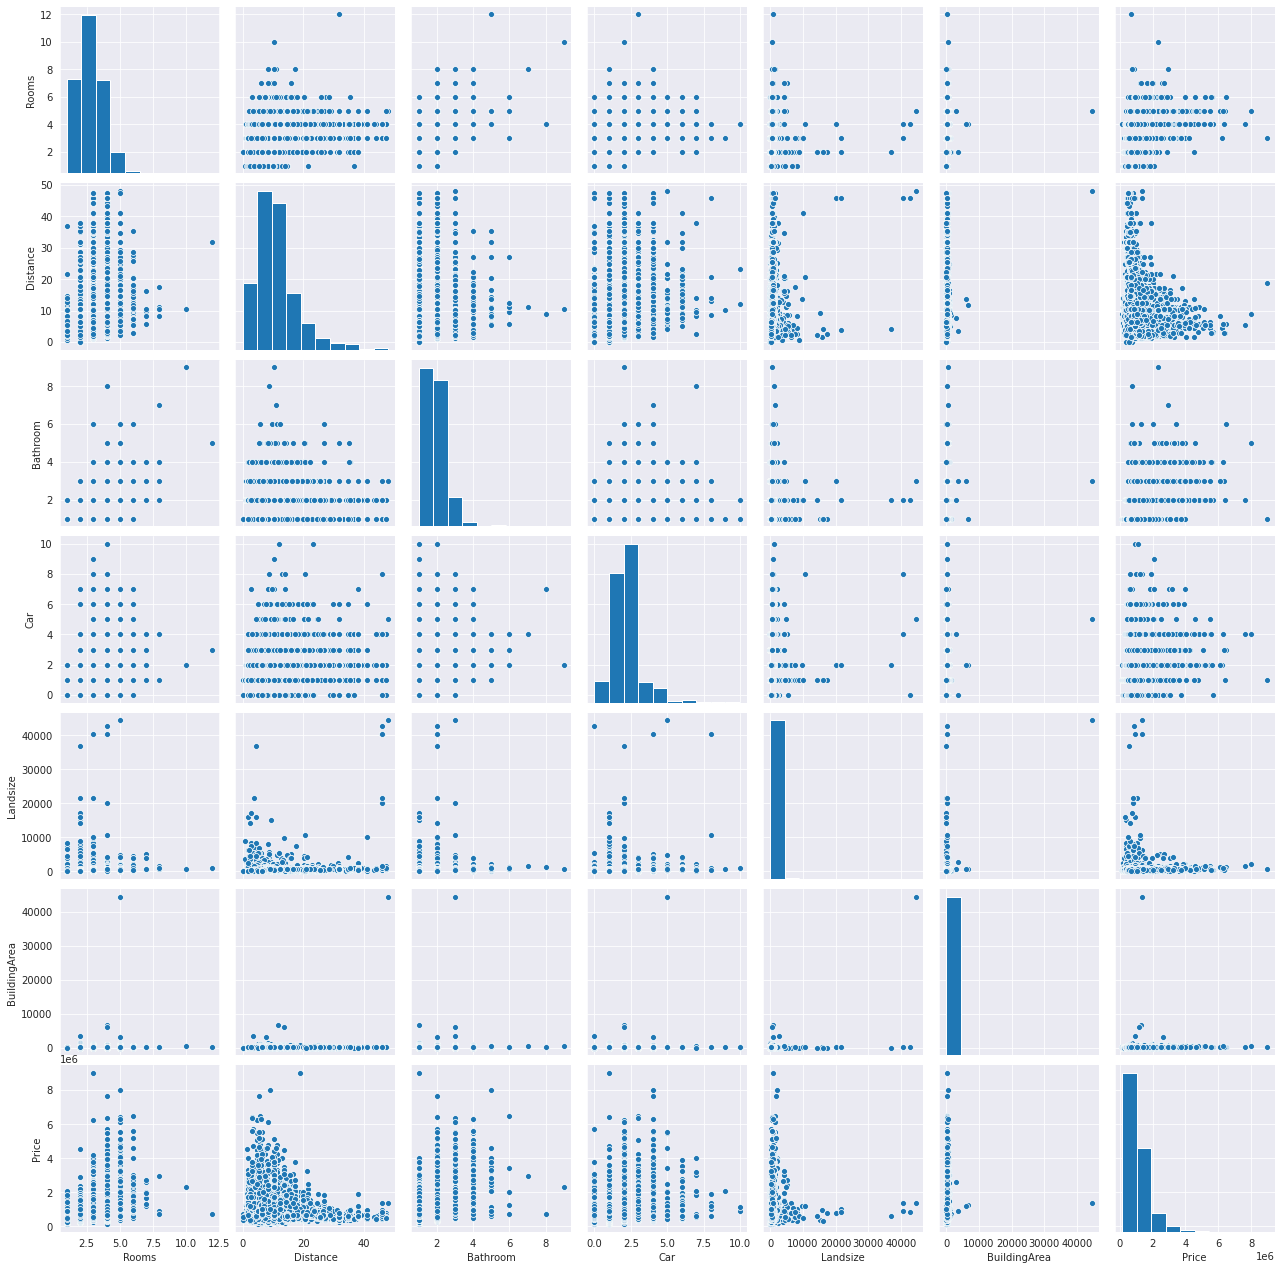

In [0]:
sns.pairplot(df)

In [0]:
## splitando o dataset

x = df.drop(['Price'],axis=1)
y = df.Price

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(6933, 6) (6933,)
(2311, 6) (2311,)


In [0]:
## treinando um modelo de regressão linear multipla

lr = LinearRegression()
lr.fit(x_train,y_train)
lr.coef_

array([ 2.91937337e+05, -3.96883189e+04,  2.14182464e+05,  4.81893042e+04,
        1.75684873e+01,  3.29228029e+01])

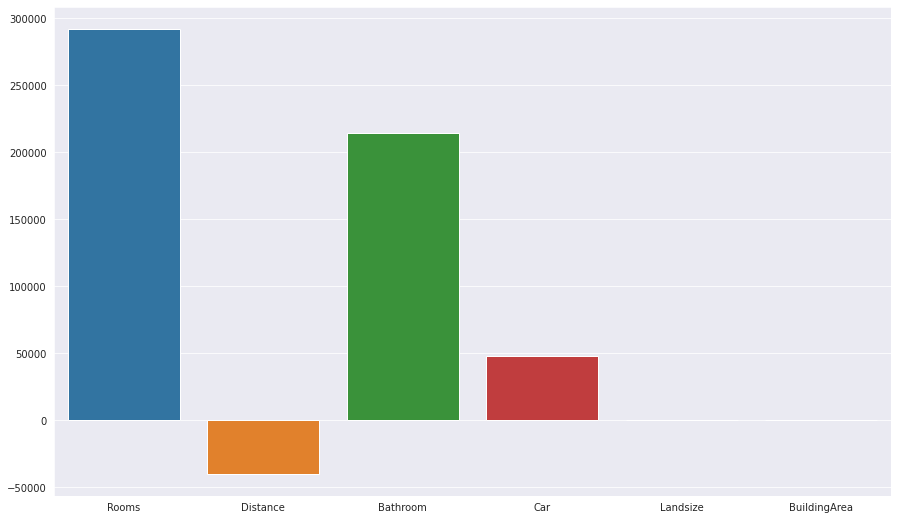

In [0]:
## verificando os pesos

plt.figure(figsize=(15,9))
sns.barplot(x = x_train.columns,y = lr.coef_)
plt.show()

In [0]:
## MSE de teste do modelo

y_pred = lr.predict(x_test)
mean_squared_error(y_test,y_pred)

280083847108.7673

In [0]:
## RMSE de teste do modelo

np.sqrt(mean_squared_error(y_test,y_pred))

529229.4843532125

In [0]:
## r2 de teste do modelo

lr.score(x_test,y_test)

0.385704077883528

In [0]:
## comparando com a API

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.385704077883528

In [0]:
## avaliação no treino

y_pred_train = lr.predict(x_train)
print(mean_squared_error(y_train,y_pred_train))
print(np.sqrt(mean_squared_error(y_train,y_pred_train)))
print(lr.score(x_train,y_train))

270073031034.8642
519685.511665338
0.4176840683710384


## Demonstrando r2

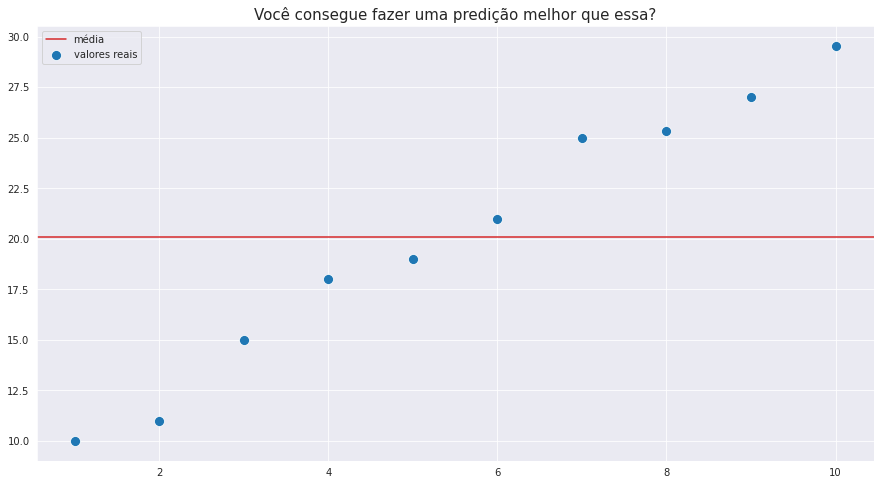

In [0]:
## demonstrando r2

x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([10,11,15,18,19,21,25,25.33,27,29.55])

plt.figure(figsize=(15,8))
sns.scatterplot(x=x,y=y,s=100,label='valores reais')
plt.axhline(y.mean(),color='tab:red',label='média')
plt.title('Você consegue fazer uma predição melhor que essa?',size=15)
plt.legend()
plt.show()

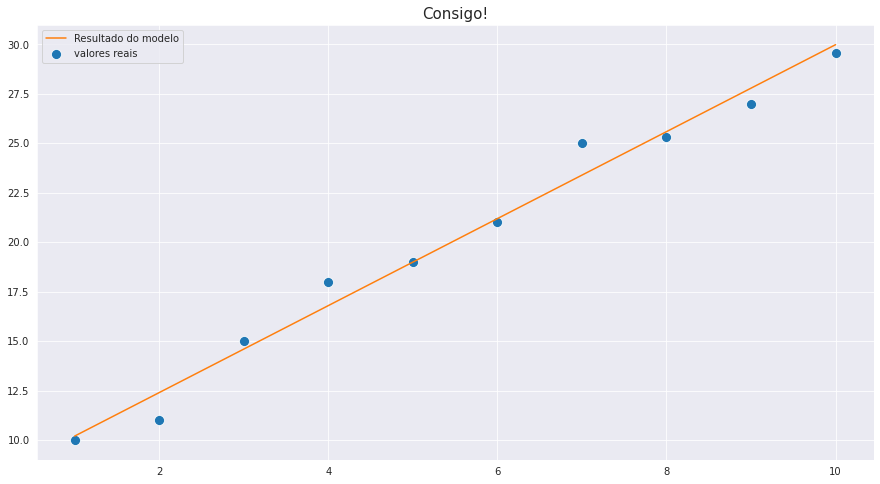

In [0]:
## valores reais
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([10,11,15,18,19,21,25,25.33,27,29.55])

## valor predito
y_pred = np.array([10.19890909, 12.39648485, 14.59406061, 16.79163636, 18.98921212,21.18678788, 23.38436364, 25.58193939, 27.77951515, 29.97709091])

## gráfico
plt.figure(figsize=(15,8))
sns.scatterplot(x=x,y=y,s=100,label='valores reais')
sns.lineplot(x=x,y=y_pred,label='Resultado do modelo',color='tab:orange')
plt.title('Consigo!',size=15)
plt.legend()
plt.show()

In [0]:
## definindo nosso_r2

def nosso_r2(y_true,y_pred):

  med = y_true.mean()

  ssreg = sum((y_true - y_pred)**2)
  sstotal = sum((y_true - med)**2)

  return 1-(ssreg/sstotal)

In [0]:
## conferindo o r2 do modelo
nosso_r2(y,y_pred)

0.9824589902504507

In [0]:
## comparando resultado com a API do sklearn
r2_score(y,y_pred)

0.9824589902504507

## Regressão Polinomial

In [0]:
## definindo a função

def val_model(y_true,y_pred):
  print('x-x-x PRINTING METRICS FOR THE MODEL x-x-x')
  print('--'*30)
  print(f'MEAN SQUARE ERROR      : {mean_squared_error(y_true,y_pred)}')
  print(f'ROOT MEAN SQUARE ERROR : {np.sqrt(mean_squared_error(y_true,y_pred))}')
  print(f'R2                     : {r2_score(y_true,y_pred)}')

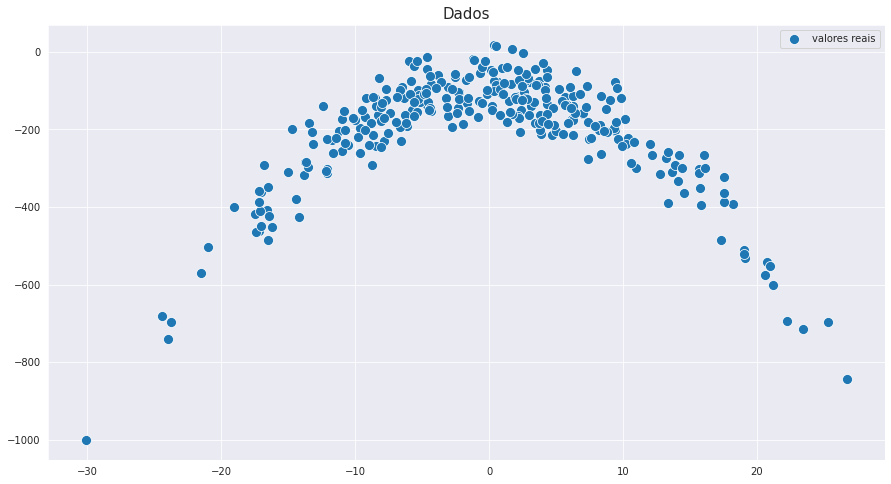

In [0]:
## plotando os dados
x=10*np.random.normal(0,1,300)
y=(-x**2)+np.random.normal(-100,50,300)
plt.figure(figsize=(15,8))
sns.scatterplot(x=x,y=y,s=100,label='valores reais')
plt.title('Dados',size=15)
plt.legend()
plt.show()

In [0]:
## treinando um modelo linear
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(x.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

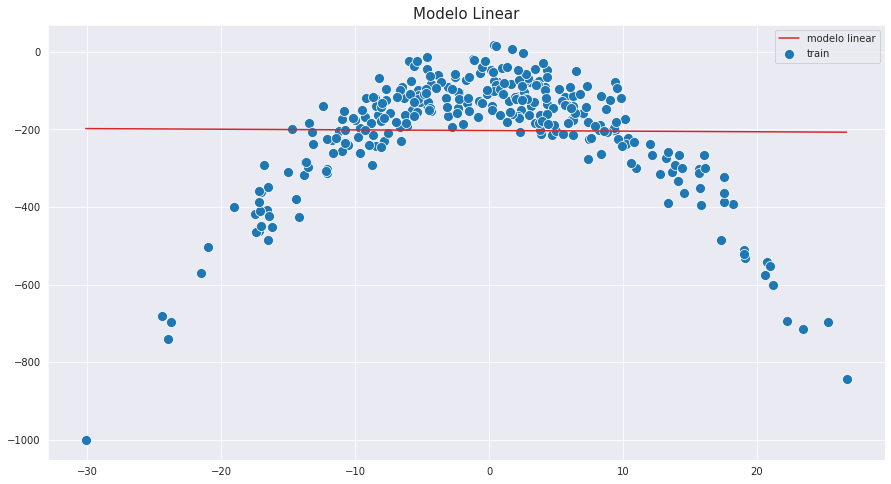

In [0]:
## plotando o modelo linear
plt.figure(figsize=(15,8))
sns.scatterplot(x=x,y=y,s=100,label='train',color='tab:blue')
sns.lineplot(x = x, y = lr.predict(x.reshape(-1,1)),label='modelo linear',color = 'tab:red')
plt.title('Modelo Linear',size=15)
plt.legend()
plt.show()

In [0]:
## avaliando o modelo

y_pred = lr.predict(x.reshape(-1,1))

val_model(y,y_pred)

x-x-x PRINTING METRICS FOR THE MODEL x-x-x
------------------------------------------------------------
MEAN SQUARE ERROR      : 22469.546237927352
ROOT MEAN SQUARE ERROR : 149.8984530871728
R2                     : 0.00011951644286400942


In [0]:
## criando as features polinominais

from sklearn.preprocessing import PolynomialFeatures

pol_transformer = PolynomialFeatures(degree=2)
x_poly = pol_transformer.fit_transform(x.reshape(-1,1))

In [0]:
x_poly

array([[ 1.00000000e+00,  1.20325206e+01,  1.44781552e+02],
       [ 1.00000000e+00, -9.27867875e+00,  8.60938793e+01],
       [ 1.00000000e+00,  1.56642819e+01,  2.45369727e+02],
       [ 1.00000000e+00,  8.38412263e+00,  7.02935123e+01],
       [ 1.00000000e+00,  3.11044205e+00,  9.67484972e+00],
       [ 1.00000000e+00,  7.01163130e+00,  4.91629735e+01],
       [ 1.00000000e+00, -5.96223740e+00,  3.55482748e+01],
       [ 1.00000000e+00,  8.78479523e+00,  7.71726272e+01],
       [ 1.00000000e+00, -4.61471465e+00,  2.12955913e+01],
       [ 1.00000000e+00, -2.22992504e+00,  4.97256567e+00],
       [ 1.00000000e+00,  9.02772006e+00,  8.14997294e+01],
       [ 1.00000000e+00, -1.17031549e+01,  1.36963834e+02],
       [ 1.00000000e+00,  5.64310013e+00,  3.18445790e+01],
       [ 1.00000000e+00, -1.62175080e+00,  2.63007566e+00],
       [ 1.00000000e+00,  7.02796216e+00,  4.93922521e+01],
       [ 1.00000000e+00,  8.35635901e+00,  6.98287359e+01],
       [ 1.00000000e+00, -8.19939097e+00

In [0]:
## treinando um modelo com features polinomiais

lr_poly = LinearRegression()
lr_poly.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

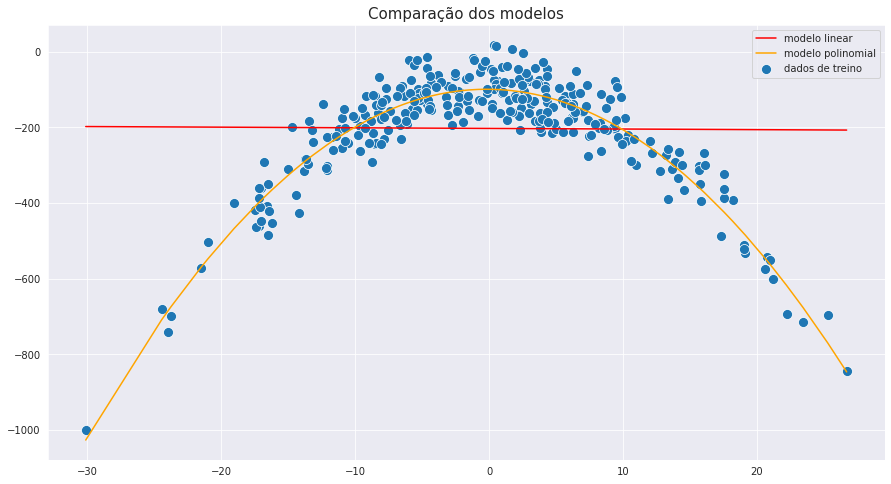

In [0]:
## plotando tudo junto
plt.figure(figsize=(15,8))
sns.scatterplot(x=x,y=y,s=100,label='dados de treino',color='tab:blue')
sns.lineplot(x = x, y = lr.predict(x.reshape(-1,1)),label='modelo linear',color = 'r')

##definindo polypred
poly_pred = lr_poly.predict(x_poly)
sorted_zip = sorted(zip(x,poly_pred))
x_poly_graph, poly_pred = zip(*sorted_zip)

## plotando o modelo polinomial
sns.lineplot(x = x_poly_graph, y = poly_pred,label='modelo polinomial',color = 'orange')
plt.title('Comparação dos modelos',size=15)
plt.legend()
plt.show()

In [0]:
## avaliando o modelo polinomial

y_pred = lr_poly.predict(x_poly)

val_model(y,y_pred)

x-x-x PRINTING METRICS FOR THE MODEL x-x-x
------------------------------------------------------------
MEAN SQUARE ERROR      : 2652.465900065143
ROOT MEAN SQUARE ERROR : 51.5020960744817
R2                     : 0.8819669583580968


In [0]:
## polynomial regression + pipeline

from sklearn.pipeline import Pipeline

val_score = {}

for i in range(2,15):
  steps = [('poly',PolynomialFeatures(degree=i)),('model',LinearRegression())]
  pipe = Pipeline(steps)
  pipe.fit(x.reshape(-1,1),y)
  y_pred = pipe.predict(x.reshape(-1,1))
  val_score[i] = [r2_score(y,y_pred),np.sqrt(mean_squared_error(y,y_pred))]

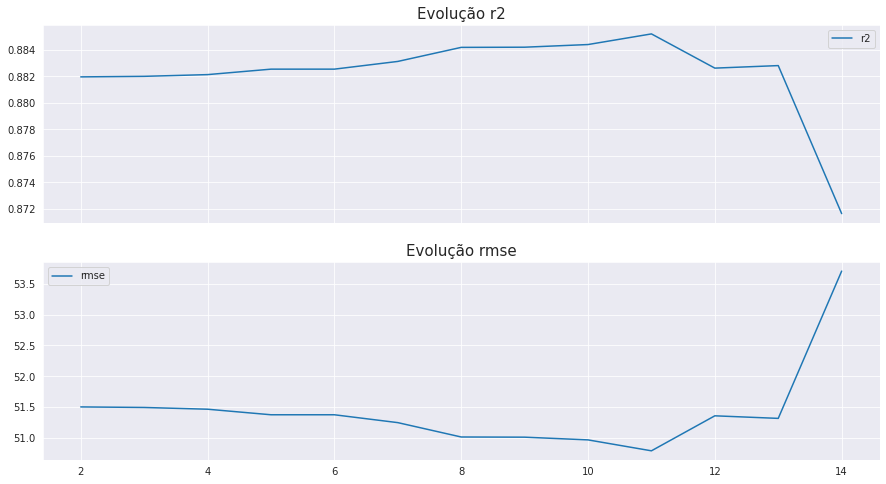

In [0]:
## plotando

f, ax = plt.subplots(2,1,figsize=(15,8),sharex=True)

sns.lineplot(x = list(val_score.keys()), y = [val_score[key][0] for key in val_score.keys()],label='r2',ax=ax[0])
sns.lineplot(x = list(val_score.keys()), y = [val_score[key][1] for key in val_score.keys()],label='rmse',ax=ax[1])

ax[0].set_title('Evolução r2',size=15)
ax[1].set_title('Evolução rmse',size=15)

plt.legend()
plt.show()

## Melhorando o modelo das casas de melbourne

In [0]:
## lendo o dataset
df = pd.read_csv('/content/regression_dataset01_melbourne.csv',sep=';')

## separando x e y
x = df.drop(['Price'],axis=1)
y = df.Price

In [0]:
train_error = []
test_error = []

for i in range(2,7):

  ## transformando x
  poly = PolynomialFeatures(i)
  x_poly = poly.fit_transform(x)

  ## splitando o dataset
  x_train, x_test, y_train, y_test = train_test_split(x_poly,y,test_size=0.25,random_state=42)

  ## treinando para I
  regressor = LinearRegression()
  regressor.fit(x_train,y_train)

  ## avaliando o erro no test
  y_pred = regressor.predict(x_test)
  test_error.append(mean_squared_error(y_test,y_pred))

  ## avaliando o erro no treino
  train_error.append(mean_squared_error(y_train,regressor.predict(x_train)))

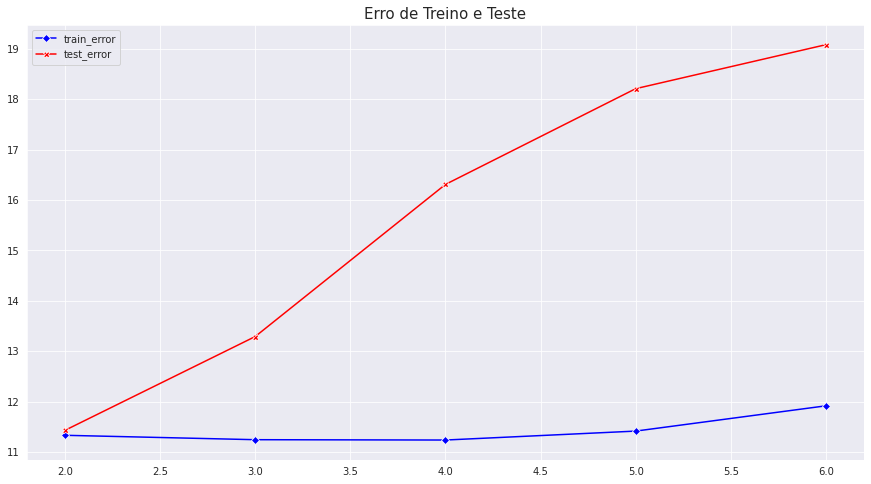

In [0]:
## plotando os erros de treino e teste

plt.figure(figsize=(15,8))

train_error = np.log10(train_error)
test_error = np.log10(test_error)

sns.lineplot(x=list(range(2,7)),y=train_error,label='train_error',color='b',marker='D')
sns.lineplot(x=list(range(2,7)),y=test_error,label='test_error',color='r',marker='X')

plt.title('Erro de Treino e Teste',size=15)
plt.legend()
plt.show()

## Cross Validation

Avaliando vários modelos.

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
## lendo o dataset
df = pd.read_csv('/content/regression_dataset01_melbourne.csv',sep=';')

## separando x e y
x = df.drop(['Price'],axis=1)
y = df.Price

In [0]:
## transformando as features

poly = PolynomialFeatures(2)
poly_x = poly.fit_transform(x)

In [0]:
## usando o cross_val_score

modelo = LinearRegression()

(cross_val_score(modelo,poly_x,y,cv=10,scoring='neg_root_mean_squared_error')*-1)

array([  619200.10656456,   682525.52206306,   445777.64908942,
         475269.26617279,   457163.61645115,   464021.39558731,
         474859.59521624, 52034423.72453149,   699837.18128355,
         480217.26898749])

In [0]:
## testando para vários 'i' em Polynomial features

data = []

for i in range(2,7):
  poly = PolynomialFeatures(i)
  poly_x = poly.fit_transform(x)

  modelo = LinearRegression()
  data.append((cross_val_score(modelo,poly_x,y,cv=10,scoring='neg_root_mean_squared_error')*-1).mean())

In [0]:
np.log10(data)

array([ 6.75460284,  8.46559229, 11.19852639, 13.52732512, 15.34056271])

In [0]:
## usando cross_val_score para comparar modelos

from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

def train_models(x,y,cv):

  error = pd.DataFrame([])

  ## val dummy
  dummy = DummyRegressor('mean')
  error['dummy'] = (cross_val_score(dummy,x,y,cv=cv,scoring='neg_root_mean_squared_error')*-1)

  ## val LinearModel
  linear = LinearRegression()
  error['linear'] = (cross_val_score(linear,x,y,cv=cv,scoring='neg_root_mean_squared_error')*-1)
  
  ## val DecisionTree
  dt_reg = DecisionTreeRegressor(max_depth=5,max_features=4,min_samples_leaf=5)
  error['tree'] = (cross_val_score(dt_reg,x,y,cv=cv,scoring='neg_root_mean_squared_error')*-1)

  error = error.transpose()
  error = error.assign(mean = lambda x: x.mean(axis=1))
  
  return error

In [0]:
## usando a função acima com cv=10

train_models(x,y,10)

,0,1,2,3,4,5,6,7,8,9,mean
dummy,784306.612226,698247.389687,661360.050102,676198.254000,653301.300146,650153.677900,629790.335595,6.538235e+05,698214.415453,694662.313112,680005.787171
linear,564942.533584,487885.628974,496423.165099,518130.647738,508954.320359,506795.844679,528893.603905,1.016350e+06,566997.409849,536114.437184,573148.766877
tree,569315.936791,478115.267263,476142.742621,486865.434540,452373.551739,430812.711998,463215.063850,5.032202e+05,493477.778077,451514.468756,480505.313436


## Decision Trees

In [0]:
## demonstrando valores de entropia

from scipy.stats import entropy

data = []

for i in range(11):
  data.append(entropy([i/10,(10-i)/10],base=2))

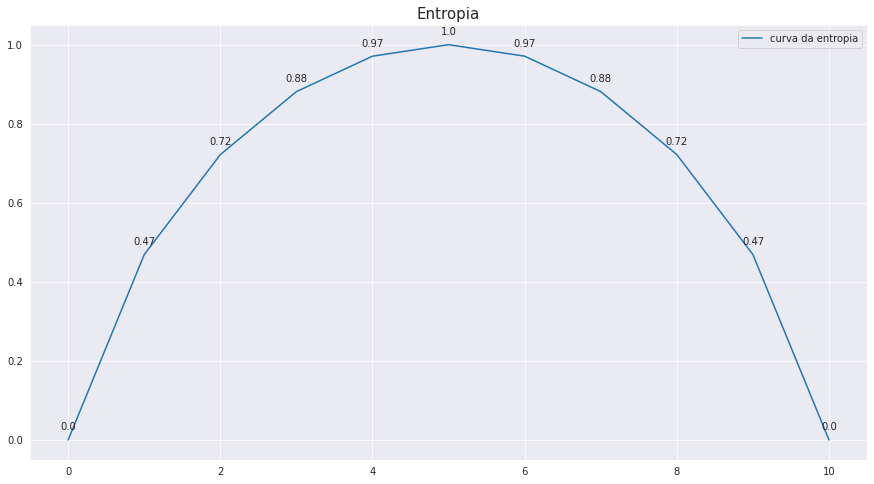

In [12]:
## plotando entropia

plt.figure(figsize=(15,8))
sns.lineplot(x=list(range(11)),y=data,label='curva da entropia')

for i,value in enumerate(data):
  plt.text(x = i , y = value + 0.02, s = round(value,2),horizontalalignment='center',verticalalignment='bottom')

plt.title('Entropia',size=15)
plt.show()

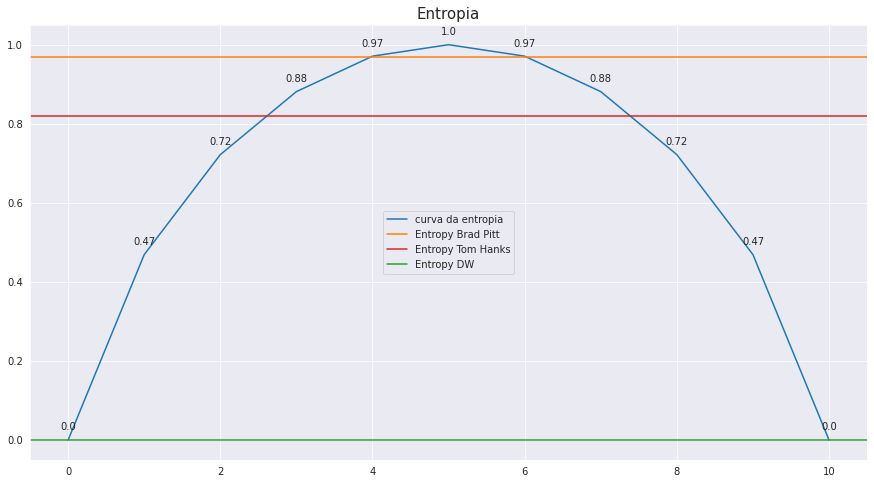

In [65]:
## plotando os 3 atores

plt.figure(figsize=(15,8))
sns.lineplot(x=list(range(11)),y=data,label='curva da entropia')

for i,value in enumerate(data):
  plt.text(x = i , y = value + 0.02, s = round(value,2),horizontalalignment='center',verticalalignment='bottom')

plt.axhline(y=0.97,label = 'Entropy Brad Pitt', color='tab:orange')
plt.axhline(y=0.82,label = 'Entropy Tom Hanks', color='tab:red')
plt.axhline(y=0.0,label = 'Entropy DW', color='tab:green')

plt.legend()
plt.title('Entropia',size=15)
plt.show()

In [127]:
## lendo o dataset

import pandas as pd
df = pd.read_csv('/content/decision_tree_example - Página1.csv')
df.head()

,Filme,Ator,Categoria,Avaliação,Assistiu?
0,Bastador Inglórios,Brad Pitt,Ação,Mediana,Não
1,Porcos e Diamantes,Brad Pitt,Ação,Mediana,Não
2,Tróia,Brad Pitt,Ação,Baixa,Não
3,O curioso caso de Benjamin Button,Brad Pitt,Drama,Mediana,Não
4,Sr e Sra Smith,Brad Pitt,Romance,Baixa,Não


In [0]:
## definindo X e Y
x = df.drop(['Filme','Assistiu?'],axis=1)
y = df['Assistiu?']

In [0]:
## importando o modelo
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [130]:
## treinando

dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x,y)

ValueError: ignored

In [131]:
## fatorizando a coluna Ator

pd.factorize(x['Ator'])

(array([0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2]),
 Index(['Brad Pitt', 'Denzel Washington', 'Tom Hanks'], dtype='object'))

In [132]:
## fatorizando a coluna Categoria

pd.factorize(x['Categoria'])

(array([0, 0, 0, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2]),
 Index(['Ação', 'Drama', 'Romance'], dtype='object'))

In [133]:
## fatorizando a coluna Avaliação

pd.factorize(x['Avaliação'])

(array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2]),
 Index(['Mediana', 'Baixa', 'Excepcional'], dtype='object'))

In [0]:
for feature in x.columns:
  x[feature] = pd.factorize(x[feature])[0]

In [136]:
x.head()

,Ator,Categoria,Avaliação
0,0,0,0
1,0,0,0
2,0,0,1
3,0,1,0
4,0,2,1


In [140]:
## treinando

dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [141]:
## classes

dt.classes_

array(['Não', 'Sim'], dtype=object)

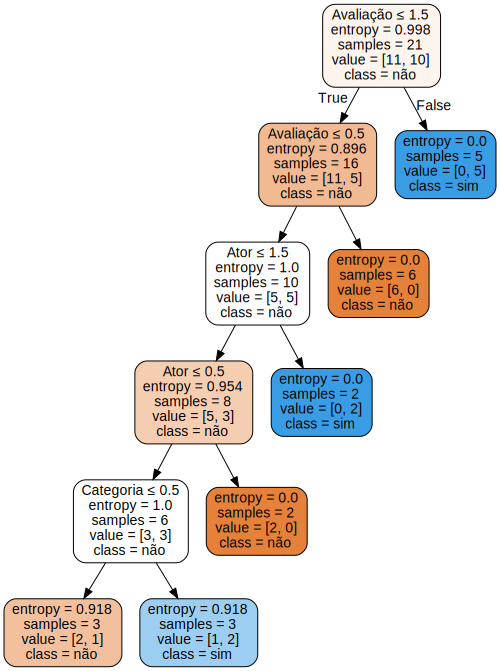

In [143]:
import graphviz

# dot is a graph description language
dot = tree.export_graphviz(dt, out_file=None, 
                           feature_names=x.columns.values,  
                           class_names=["não", "sim"],  
                           filled=True, rounded=True,  
                           special_characters=True) 

# we create a graph from dot source using graphviz.Source
graph = graphviz.Source(dot) 
graph

In [147]:
## inspecionando a importância das features

print(dt.feature_importances_)
print(x.columns)

[0.25880148 0.03171774 0.70948078]
Index(['Ator', 'Categoria', 'Avaliação'], dtype='object')


In [150]:
## predizendo o resultado para um filme do Brad Pitt, de romance, de avalição baixa

dt.predict([[0,2,1]])

array([[1., 0.]])

In [151]:
## predizendo o resultado para um filme do Brad Pitt, de romance, de avalição mediana

dt.predict([[0,2,0]])

array([[0.33333333, 0.66666667]])

In [152]:
## avaliando as probabilidades para um filme do Brad Pitt, de romance, de avalição baixa

dt.predict_proba([[0,2,1]])

array([[1., 0.]])

In [153]:
## avaliando as probabilidades para um filme do Brad Pitt, de romance, de avalição mediana

dt.predict_proba([[0,2,0]])

array([[0.33333333, 0.66666667]])

## Deicison Tree + Titanic